In [1]:
# ----------------------------------
# DAY 10: STATISTICS FOR DATA SCIENCE
# ----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Cleaning
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print("📈 Day 10: Correlation, Covariance & Hypothesis Testing 📈")


📈 Day 10: Correlation, Covariance & Hypothesis Testing 📈


/tmp/ipython-input-1440137560.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1440137560.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Covariance

Shows how two variables move together.

In [2]:
cov_age_fare = np.cov(df['Age'], df['Fare'])[0][1]
print("Covariance between Age and Fare:", cov_age_fare)


Covariance between Age and Fare: 59.16220028968937


Interpretation:

Positive → both increase together

Negative → one increases, other decreases

Near 0 → weak/no relationship

Correlation (Pearson)

Standardized relationship strength between -1 and +1.

In [3]:
corr_age_fare = df['Age'].corr(df['Fare'])
print("Correlation between Age and Fare:", corr_age_fare)


Correlation between Age and Fare: 0.09156609328505762


Or using SciPy:

In [4]:
corr, p_value = pearsonr(df['Age'], df['Fare'])
print("Pearson Correlation:", corr)
print("P-value:", p_value)


Pearson Correlation: 0.0915660932850576
P-value: 0.006235676128303337


Correlation Heatmap

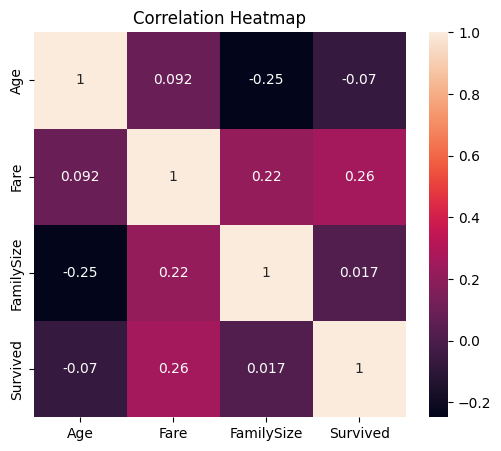

In [5]:
features = df[['Age', 'Fare', 'FamilySize', 'Survived']]
corr_matrix = features.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


Hypothesis Testing – t-test

Does Age differ between survivors and non-survivors?

Hypotheses:

H₀: Mean age of survivors = Mean age of non-survivors

H₁: They are different

In [6]:
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

t_stat, p_val = ttest_ind(survived, not_survived)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀ → Age has significant effect on survival")
else:
    print("Fail to reject H₀ → No significant age difference")


T-statistic: -2.0865081090373168
P-value: 0.03721708372685034
Reject H₀ → Age has significant effect on survival


Hypothesis Testing – Chi-Square Test

Does Gender affect survival?

Hypotheses:

H₀: Gender and Survival are independent

H₁: Gender and Survival are dependent

In [7]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("P-value:", p)

if p < 0.05:
    print("Reject H₀ → Gender significantly affects survival")
else:
    print("Fail to reject H₀ → No significant relationship")


Survived    0    1
Sex               
female     81  233
male      468  109
Chi-square: 260.71702016732104
P-value: 1.1973570627755645e-58
Reject H₀ → Gender significantly affects survival


Visualization for Hypothesis Results

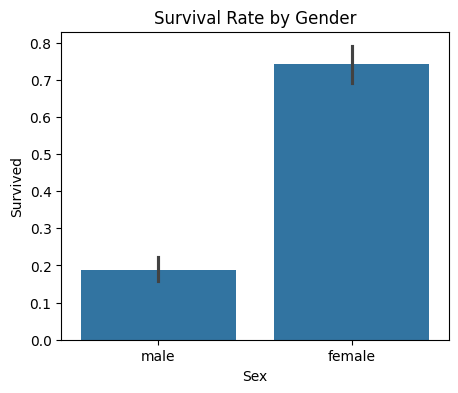

In [8]:
plt.figure(figsize=(5,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


    Concept	Use
    Covariance	Direction of relationship
    Correlation	Strength + direction
    T-test	Compare two group means
    **Chi**-square	Relationship between categorical *variables*